In [64]:
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import glob
from astropy.table import Table
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import cm
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
homedir = os.path.expanduser('~')
def normalized_cmap(val, low, high, cmap):
    cmap = plt.get_cmap(cmap)
    rang=high-low
    return cmap(int((val-low)*255/rang))
c = 2.99792e5 # km/s

from config_run import goodchips_run

### Binned BTSettl fits

In [4]:
chipmods = {}
chiplams = {}
chisq = {}
vsini = {}
rv = {}
lld = {}
modellist = []
for f in sorted(glob.glob(f"{homedir}/uoedrive/result/CIFIST/IGRINS_W1049B_K_binned_chipmods_*.fits")):
    modelname = f.split("_")[-1][:12]
    chipmods[modelname] = fits.getdata(f)
    modellist.append(modelname)
for f in sorted(glob.glob(f"{homedir}/uoedrive/result/CIFIST/IGRINS_W1049B_K_binned_chiplams_*.fits")):
    modelname = f.split("_")[-1][:12]
    chiplams[modelname] = fits.getdata(f)
for f in sorted(glob.glob(f"{homedir}/uoedrive/result/CIFIST/IGRINS_W1049B_K_binned_*.txt")):
    modelname = f.split("_")[-1][:12]
    results = Table.read(f, format='ascii')
    chisq[modelname] = results['chisq']
    vsini[modelname] = results['vsini']
    rv[modelname] = results['rv']
    lld[modelname] = results['lld']
chisq.keys()

TimeoutError: [Errno 60] Operation timed out

In [15]:
# find best fitting model
df = pd.DataFrame({
    'model name':[model for model in modellist], 
    'median':[np.median(chisq[model]) for model in modellist], 
    'mean':[np.mean(chisq[model]) for model in modellist], 
    'min':[np.min(chisq[model]) for model in modellist]
})
df = df.sort_values(by=['median'])
df.style.hide(axis="index")

model name,median,mean,min
lte016.5-5.5,1.226768,4.863205,0.250417
lte016.5-5.0,1.401552,5.080762,0.207291
lte018.5-5.5,1.418397,5.099387,0.204548
lte018.5-5.0,1.636534,5.293795,0.247263
lte014.0-5.5,1.756948,5.612197,0.226133
lte014.0-5.0,2.259868,6.010737,0.178264
lte015.5-5.0,9845.881977,11145.087727,5138.052280
lte015.5-5.5,10315.912803,11795.918263,5167.838476
lte018.0-5.5,10431.698558,11812.903185,4146.584169
lte016.0-5.5,10502.081194,11858.573593,5322.509476


Text(0.5, 1.0, 'fitted K band spectrum using model lte015.0-5.0, t=0')

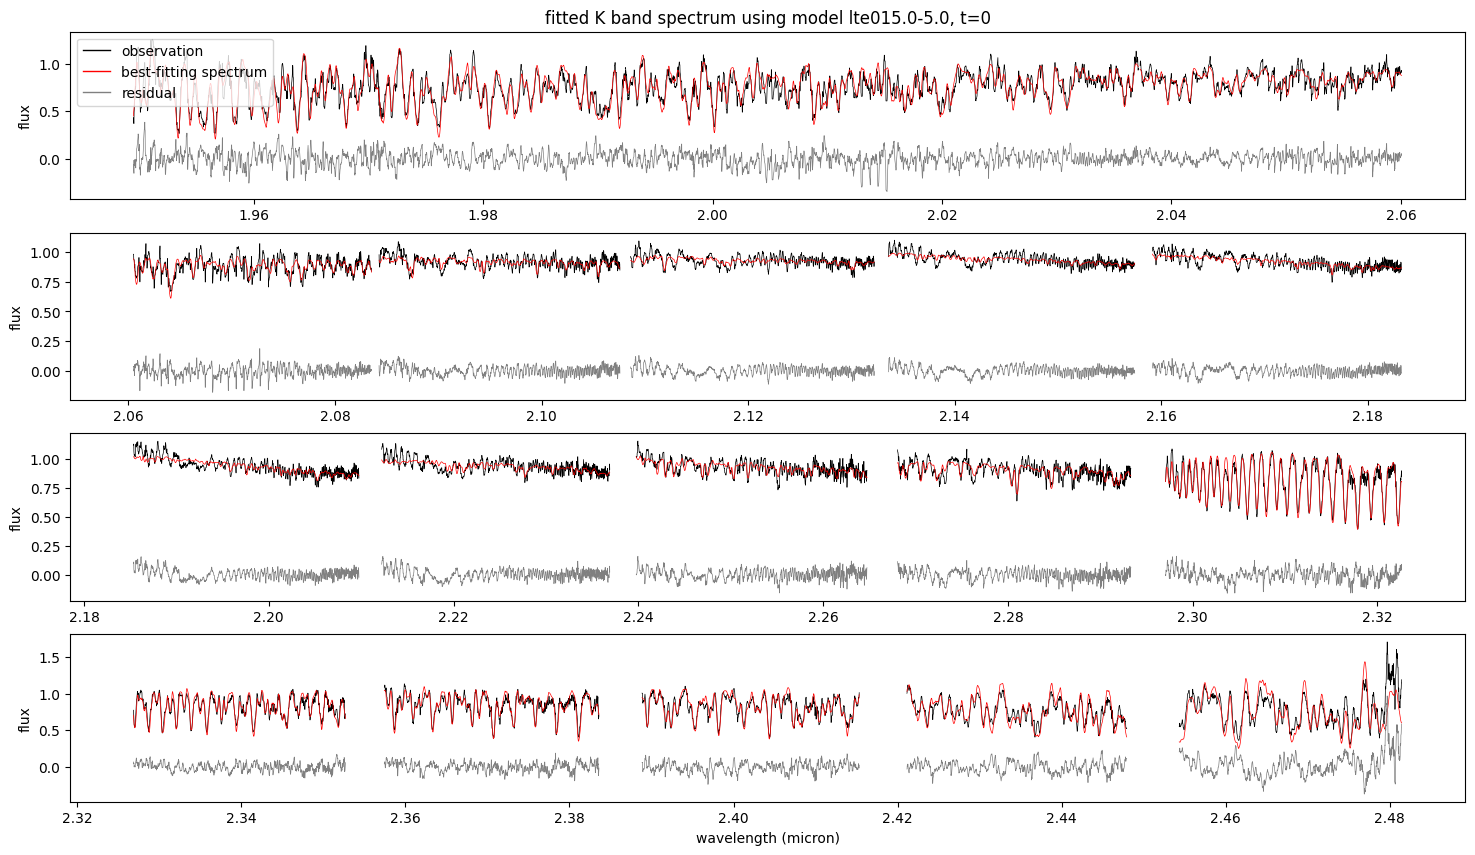

In [22]:
# plot best fitting spectrum
model = 'lte015.0-5.0'
pad = 100
filename = f'IGRINS_W1049B_K_{model}.pickle'
with open(f"{homedir}/uoedrive/result/CIFIST/{filename}", 'rb') as f:
    ret = pickle.load(f, encoding="latin1")
fobs = ret['fobs0']
fobs = fobs[:20]
wobs = ret['wobs']
plt.figure(figsize=(18,10))

t=0
for sub in range(4):
    plt.subplot(4,1, 4-sub)
    for jj in range(sub*5, sub*5+5):
        plt.plot(chiplams[model][t,jj,pad:-pad], fobs[t,jj,pad:-pad], linewidth=0.5, color="black", label="observation")
        plt.plot(chiplams[model][t,jj,pad:-pad], chipmods[model][t,jj,pad:-pad], linewidth=0.5, color="r", label="fitted")
        plt.plot(chiplams[model][t,jj,pad:-pad], fobs[t,jj,pad:-pad] - chipmods[model][t,jj,pad:-pad], linewidth=0.5, color="gray")
    plt.ylabel("flux")
    #plt.ylim((0,2))
    if sub==0:
        plt.xlabel("wavelength (micron)")
    if sub==3:
        custom_lines = [Line2D([0], [0], color="black", lw=1),
                        Line2D([0], [0], color="r", lw=1),
                        Line2D([0], [0], color="gray", lw=1),]
        plt.legend(custom_lines, ["observation", "best-fitting spectrum", "residual"], loc=2)
plt.title(f"fitted K band spectrum using model {model}, t={t}")

vsini: 32.54 ± 21.24 km/s, rv: 24.64 ± 16.16 km/s


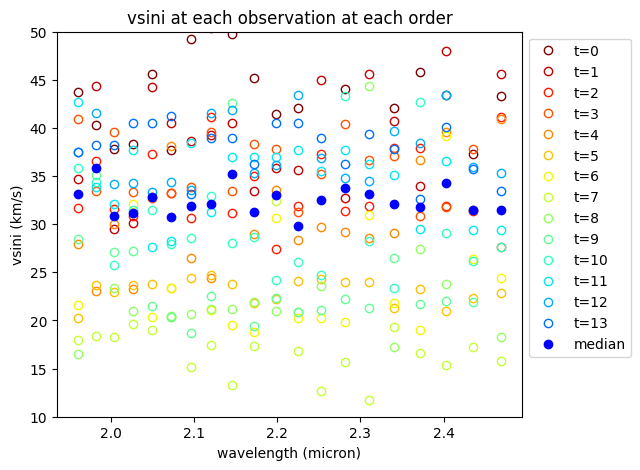

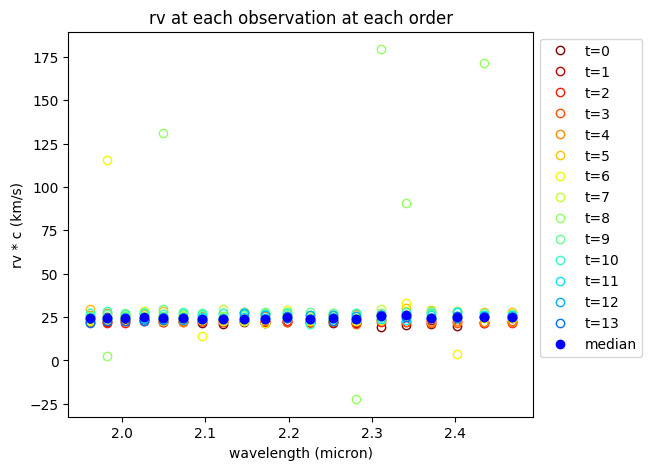

In [19]:
# vsini and rv for bestfittin model
nobs=14
print(f'vsini: {np.median(vsini[model]):.2f} ± {np.std(vsini[model]):.2f} km/s, rv: {np.median(rv[model])*c:.2f} ± {np.std(rv[model])*c:.2f} km/s')
colors = [cm.jet_r(x) for x in np.linspace(0, 1, nobs+4)]
plt.figure(figsize=(6,5))
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl
vsini_points = vsini[model].reshape((nobs, 20))
for k in range(nobs):
    plt.plot(lam_points, vsini_points[k], "o", mfc="none", color=colors[k], label=f't={k}')
plt.plot(lam_points, np.median(vsini_points, axis=0), "o", label="median", color="blue")
plt.xlabel("wavelength (micron)")
plt.ylabel("vsini (km/s)")
plt.ylim((10,50))
plt.title("vsini at each observation at each order")
plt.legend(loc=2, bbox_to_anchor=(1,1))

plt.figure(figsize=(6,5))
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl
rv_points = rv[model].reshape((nobs, 20)) * c
for k in range(nobs):
    plt.plot(lam_points, rv_points[k], "o", mfc="none", color=colors[k], label=f't={k}')
plt.plot(lam_points, np.median(rv_points, axis=0), "o", label="median", color="blue")
plt.xlabel("wavelength (micron)")
plt.ylabel("rv * c (km/s)")
#plt.ylim((10,50))
plt.title("rv at each observation at each order")
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

### Binned Callie fits

In [2]:
datadir = f"{homedir}/uoedrive/result/Callie"
instru = "IGRINS"
target = "W1049B"
band = "K"

In [4]:
nobs = 14
chipmods = {}
chiplams = {}
chisq = {}
vsini = {}
rv = {}
lld = {}
wcoef = {}
modellist = []
for f in sorted(glob.glob(f"{datadir}/IGRINS_W1049B_K_binned_chipmods_*.fits")):
    modelname = f.split("_")[-1][:12]
    chipmods[modelname] = fits.getdata(f)
    modellist.append(modelname)
for f in sorted(glob.glob(f"{datadir}/IGRINS_W1049B_K_binned_chiplams_*.fits")):
    modelname = f.split("_")[-1][:12]
    chiplams[modelname] = fits.getdata(f)
for f in sorted(glob.glob(f"{datadir}/IGRINS_W1049B_K_binned_*.txt")):
    modelname = f.split("_")[-1][:12]
    results = Table.read(f, format='ascii')
    chisq[modelname] = results['chisq']
    vsini[modelname] = results['vsini']
    rv[modelname] = results['rv']
    lld[modelname] = results['lld']
chisq.keys()

dict_keys(['t1400g1000f1', 't1400g1000f2', 't1400g1000f3', 't1400g1000f4', 't1400g1000f8', 't1400g1000nc', 't1500g1000f1', 't1500g1000f2', 't1500g1000f3', 't1500g1000f4', 't1500g1000f8', 't1500g1000nc'])

In [5]:
# find best fitting model
df = pd.DataFrame({
    'model name':[model for model in modellist], 
    'median':[np.median(chisq[model]) for model in modellist], 
    'mean':[np.mean(chisq[model]) for model in modellist], 
    'min':[np.min(chisq[model]) for model in modellist]
})
df = df.sort_values(by=['median'])
df.style.hide(axis="index")

model name,median,mean,min
t1400g1000f3,2.589084,5.589661,0.227209
t1500g1000f3,2.908357,10.250680,0.225404
t1400g1000f2,3.243133,10.281243,0.231187
t1500g1000f2,3.415791,12.642534,0.213230
t1500g1000nc,3.440270,5.435453,0.212732
t1500g1000f1,3.773516,13.043794,0.228658
t1400g1000f1,4.078947,14.412330,0.245263
t1400g1000nc,4.439655,6.336101,0.231057
t1500g1000f8,8378.508355,8791.725613,2800.138404
t1400g1000f4,10525.742877,11745.109641,3749.212467


In [109]:
model = 't1500g1000f8'
vsini_2d = np.array(np.around(vsini[model].reshape((nobs, 20)), 1))
rv_2d = np.array(np.around(rv[model].reshape((nobs, 20)) * c, 1))
lld_2d = np.array(np.around(lld[model].reshape((nobs, 20)), 2))

#remove outliers
thres = 3
print("vsini outliers:", vsini_2d[np.abs(stats.zscore(vsini_2d)) > thres])
vsini_2d[np.abs(stats.zscore(vsini_2d)) > thres] = np.nan
print("rv outliers:", rv_2d[np.abs(stats.zscore(rv_2d)) > thres])
rv_2d[np.abs(stats.zscore(rv_2d)) > thres] = np.nan
print("lld outliers:", lld_2d[np.abs(stats.zscore(lld_2d)) > thres])
lld_2d[np.abs(stats.zscore(lld_2d)) > thres] = np.nan


indices = goodchips_run[instru][target][band]

masked_vsini = vsini_2d[:, indices]
masked_rv = rv_2d[:, indices]
masked_lld = lld_2d[:, indices]


for i, jj in enumerate(range(20)):
    print(f"order {jj}\
    vsini: {np.nanmedian(vsini_2d[:,i]):.1f} ± {np.nanstd(vsini_2d[:,i]):.1f} km/s\
    rv: {np.nanmedian(rv_2d[:,i]):.1f} ± {np.nanstd(rv_2d[:,i]):.1f} km/s\
    lld: {np.nanmedian(lld_2d[:,i]):.2f} ± {np.nanstd(lld_2d[:,i]):.2f}")

print(f"all orders: \
    vsini: {np.nanmedian(vsini_2d):.1f} ± {np.nanstd(vsini_2d):.1f}\
    rv: {np.nanmedian(rv_2d):.1f} ± {np.nanstd(rv_2d):.1f}\
    lld: {np.nanmedian(lld_2d):.2f} ± {np.nanstd(lld_2d):.2f}")

print(f"good orders:\
    vsini: {np.nanmedian(masked_vsini):.1f} ± {np.nanstd(masked_vsini):.1f}\
    rv: {np.nanmedian(masked_rv):.1f} ± {np.nanstd(masked_rv):.1f}\
    lld: {np.nanmedian(masked_lld):.2f} ± {np.nanstd(masked_lld):.2f}")

vsini outliers: [104.3 295.6 132.9 622.1 352.7 227.7 175.4  66.7 100.2]
rv outliers: [ 10.1 267.9  15.   57.9 169.5  76.6  32.3  36.8  39.9  30.   28.4]
lld outliers: [-15.2  -19.45  -7.85  -7.18 -58.38  -4.56 -19.99  -5.14 -16.87 -44.86
  -9.83]
order 0    vsini: 27.6 ± 4.2 km/s    rv: 21.9 ± 1.3 km/s    lld: 0.82 ± 0.64
order 1    vsini: 26.3 ± 5.5 km/s    rv: 22.4 ± 0.9 km/s    lld: 0.48 ± 0.69
order 2    vsini: 26.3 ± 4.5 km/s    rv: 22.4 ± 0.8 km/s    lld: 0.33 ± 0.55
order 3    vsini: 29.7 ± 5.7 km/s    rv: 22.9 ± 1.8 km/s    lld: 0.91 ± 0.64
order 4    vsini: 26.0 ± 4.0 km/s    rv: 22.9 ± 0.8 km/s    lld: 0.64 ± 0.51
order 5    vsini: 26.3 ± 4.6 km/s    rv: 22.6 ± 1.2 km/s    lld: 0.91 ± 1.17
order 6    vsini: 26.6 ± 5.4 km/s    rv: 22.2 ± 1.1 km/s    lld: 0.66 ± 0.74
order 7    vsini: 28.2 ± 4.4 km/s    rv: 22.1 ± 1.3 km/s    lld: 0.61 ± 1.17
order 8    vsini: 28.9 ± 3.8 km/s    rv: 21.8 ± 1.2 km/s    lld: 0.79 ± 0.68
order 9    vsini: 27.1 ± 5.2 km/s    rv: 21.9 ± 1.1 km/s    

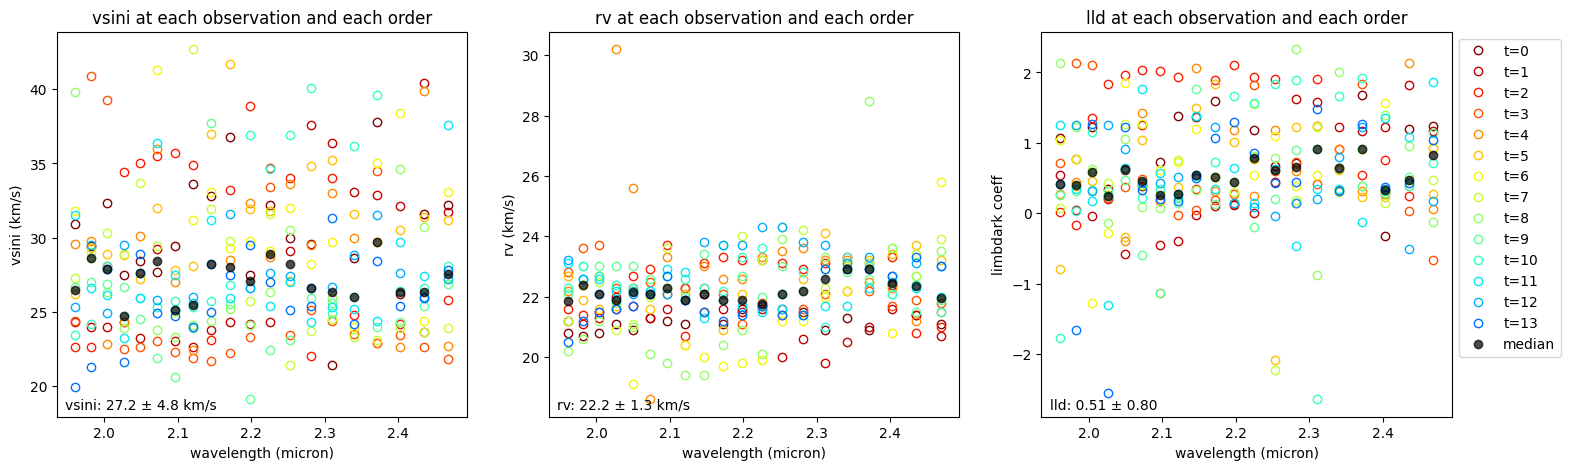

In [110]:
# vsini and rv for bestfittin model
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
colors = [cm.jet_r(x) for x in np.linspace(0, 1, nobs+4)]
lam_points = np.median(np.median(chiplams[model], axis=0), axis=1) # plot one point per wl
for k in range(nobs):
    plt.plot(lam_points[:], vsini_2d[k], "o", mfc="none", color=colors[k], label=f't={k}')
plt.plot(lam_points, np.nanmedian(vsini_2d, axis=0), "o", label="median", color="k", alpha=0.7)
plt.xlabel("wavelength (micron)")
plt.ylabel("vsini (km/s)")
#b, t = plt.ylim((10,50))
plt.title("vsini at each observation and each order")
plt.text(0.02, 0.02, f"vsini: {np.nanmedian(vsini_2d)} ± {np.nanstd(vsini_2d):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,2)
for k in range(nobs):
    plt.plot(lam_points, rv_2d[k], "o", mfc="none", color=colors[k], label=f't={k}')
plt.plot(lam_points, np.nanmedian(rv_2d, axis=0), "o", label="median", color="k", alpha=0.7)
plt.xlabel("wavelength (micron)")
plt.ylabel("rv (km/s)")
#b, t = plt.ylim((10,50))
plt.title("rv at each observation and each order")
plt.text(0.02, 0.02, f"rv: {np.nanmedian(rv_2d)} ± {np.nanstd(rv_2d):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(1,3,3)
for k in range(nobs):
    plt.plot(lam_points, lld_2d[k], "o", mfc="none", color=colors[k], label=f't={k}')
plt.plot(lam_points, np.nanmedian(lld_2d, axis=0), "o", label="median", color="k", alpha=0.7)
plt.xlabel("wavelength (micron)")
plt.ylabel("limbdark coeff")
#b, t = plt.ylim((-2,3))
plt.title("lld at each observation and each order")
plt.text(0.02, 0.02, f"lld: {np.nanmedian(lld_2d)} ± {np.nanstd(lld_2d):.2f}", transform=plt.gca().transAxes)
plt.legend(loc=2, bbox_to_anchor=(1,1));

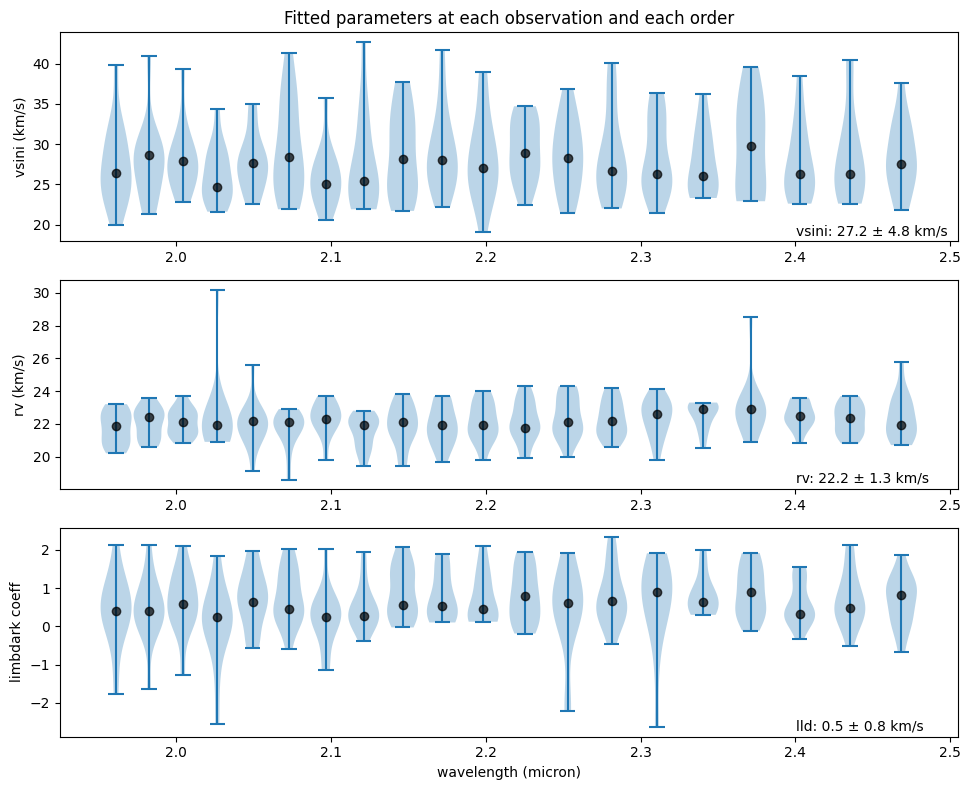

In [172]:
def filtnan(data):
    mask = ~np.isnan(data)
    return [d[m] for d, m in zip(data.T, mask.T)]
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.violinplot(filtnan(vsini_2d), positions=lam_points, widths=0.02)
plt.plot(lam_points, np.nanmedian(vsini_2d, axis=0), "o", label="median", color="k", alpha=0.7)
plt.ylabel("vsini (km/s)")
plt.title("Fitted parameters at each observation and each order")
plt.text(0.82, 0.03, f"vsini: {np.nanmedian(vsini_2d)} ± {np.nanstd(vsini_2d):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(3,1,2)
plt.violinplot(filtnan(rv_2d), positions=lam_points, widths=0.02)
plt.plot(lam_points, np.nanmedian(rv_2d, axis=0), "o", label="median", color="k", alpha=0.7)
plt.ylabel("rv (km/s)")
plt.text(0.82, 0.03, f"rv: {np.nanmedian(rv_2d)} ± {np.nanstd(rv_2d):.1f} km/s", transform=plt.gca().transAxes)

plt.subplot(3,1,3)
plt.violinplot(filtnan(lld_2d), positions=lam_points, widths=0.02)
plt.plot(lam_points, np.nanmedian(lld_2d, axis=0), "o", label="median", color="k", alpha=0.7)
plt.xlabel("wavelength (micron)")
plt.ylabel("limbdark coeff")
plt.text(0.82, 0.03, f"lld: {np.nanmedian(lld_2d):.1f} ± {np.nanstd(lld_2d):.1f} km/s", transform=plt.gca().transAxes)

plt.tight_layout()

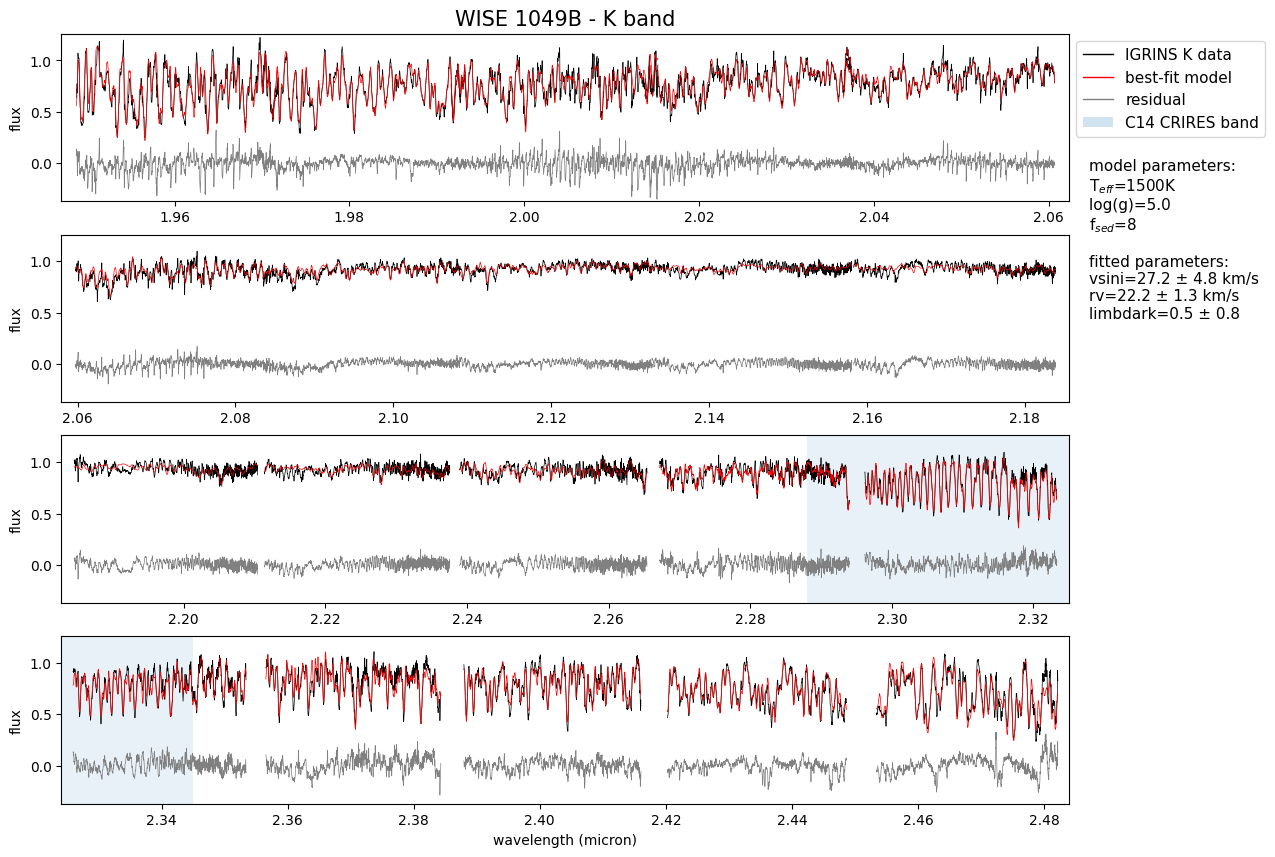

In [124]:
# plot best fitting spectrum
pad = 50
bfit_filename = f'IGRINS_W1049B_K_{model}.pickle'
with open(f"{datadir}/{bfit_filename}", 'rb') as f:
    ret = pickle.load(f, encoding="latin1")
fobs = ret['fobs0']
fobs = fobs[:20]
wobs = ret['wobs']
plt.figure(figsize=(13,10))

t=8
for sub in range(4):
    plt.subplot(4,1, 4-sub)
    for jj in range(sub*5, sub*5+5):
        plt.plot(chiplams[model][t,jj, pad:-pad], fobs[t,jj, pad:-pad], linewidth=0.5, color="black", label="observation")
        plt.plot(chiplams[model][t,jj, pad:-pad], fobs[t,jj,pad:-pad] - chipmods[model][t,jj,pad:-pad], linewidth=0.5, color="gray", label="residual")
        if jj in indices:
            plt.plot(chiplams[model][t,jj, pad:-pad], chipmods[model][t,jj, pad:-pad], linewidth=0.5, color="r", label="best-fit model")
        else:
            plt.plot(chiplams[model][t,jj, pad:-pad], chipmods[model][t,jj, pad:-pad], linewidth=0.5, color="r", label="discarded orders")
    plt.ylabel("flux")
    l, r = plt.xlim(chiplams[model][t,sub*5+4].min()-0.001, chiplams[model][t,sub*5].max()+0.001)
    plt.ylim(-0.37,1.26)
    if sub==1:
        plt.axvspan(2.288, r, alpha=0.1)
    if sub==0:
        plt.axvspan(l, 2.345, alpha=0.1)
        plt.xlabel("wavelength (micron)")
    if sub==3:
        custom_lines = [Line2D([0], [0], color="black", lw=1, label="IGRINS K data"),
                        Line2D([0], [0], color="r", lw=1, label="best-fit model"),
                        Line2D([0], [0], color="grey", lw=1, label="residual"),
                        #Line2D([0], [0], color="magenta", lw=1, label="discarded orders"),
                        Patch(facecolor='tab:blue', alpha=0.2, label="C14 CRIRES band")
                        ]
        plt.legend(handles=custom_lines, loc=2, bbox_to_anchor=(1,1), fontsize=11)

plt.title("WISE 1049B - K band", fontsize=15)
plt.text(x=1.02, y=-0.7, s="model parameters: \nT$_{eff}$=1500K \nlog(g)=5.0 \nf$_{sed}$=8\n" + 
                        f"\nfitted parameters: \nvsini={np.nanmedian(vsini_2d)} ± {np.nanstd(vsini_2d):.1f} km/s" +
                        f"\nrv={np.nanmedian(rv_2d)} ± {np.nanstd(rv_2d):.1f} km/s" +
                        f"\nlimbdark={np.nanmedian(lld_2d):.1f} ± {np.nanstd(lld_2d):.1f}",
        fontsize=11, transform=plt.gca().transAxes)
plt.savefig(f"{homedir}/uoedrive/result/paper1/specK.png", transparent=True)

In [159]:
np.array(rv_points)[:,jj] - 27

array([ 1.39383409, -3.75243691, -0.75044532, -0.1309794 ,  0.85776411,
        0.64346756, 30.85070507, -1.46520503, 13.64148607,  6.61158145,
       22.87236302,  1.25088216, 13.22311093, 13.68771703])

In [30]:
22.23/c

7.415141164540749e-05

In [161]:
jj=18
-(chiplams[model][:,jj,0] - np.median(chiplams[model][:,jj,0], axis=0)) *c /4

array([ 39.75082293, -12.67529796,  -3.70265745,   1.47031953,
         1.68401246,   0.93581459,  -0.28239283,  -2.72998383,
        31.47313612,   2.5565145 ,   0.28239283,  -5.02758859,
        -0.49512888,  -3.19798274])